In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# LOOK AT AVG PERFORMANCE OVER 25 RUNS
counts = list(range(1, 26))
data = []
for c in counts:
    path = "standard_3_euclidean_10_standard_0_0_0.0_0.0_{}.npy".format(c)
    data.append(np.load(path, allow_pickle=True).tolist())
    
MSEs = [np.mean(val["MSE"]) for val in data]
new_wins = [np.mean(val["new_added_wins"]) for val in data]

# Print the values
print("MSE: {:.3f} +/- {:.3f}".format(np.mean(MSEs), np.std(MSEs)))
print("Extra Wins Per Draft Pick: {:.3f} +/- {:.3f}".format(np.mean(new_wins), np.std(new_wins)))

MSE: 2.269 +/- 0.010
Extra Wins Per Draft Pick: 0.954 +/- 0.114


In [24]:
# Get the OS stuff
OS_vals = [2.0, 2.5, 3.0, 3.5, 4.0]
OS_sizes = [ 50, 100, 150, 200, 250]
counts = [1,2,3,4,5,6,7,8,9]
# Load the data in 
data = []
params = []
for OS_size in OS_sizes:
    for OS_val in OS_vals:
        for c in counts:
            path = "standard_3_manhattan_{}_{}_{}.npy".format(OS_size, OS_val, c)
            data.append(np.load(path, allow_pickle=True).tolist())
            params.append({"OS_val":OS_val, "OS_size":OS_size})
        
mse_avg_temp = [np.mean(val["MSE"]) for val in data]
nw_avg_temp = [np.mean(val["new_added_wins"]) for val in data]
N = len(counts)
mse, nw = np.zeros((len(OS_vals),len(OS_sizes))), np.zeros((len(OS_vals),len(OS_sizes)))
# Now average them over the counts
for i, p in enumerate(params):
    r, c = OS_vals.index(p["OS_val"]), OS_sizes.index(p["OS_size"])
    mse[r, c] += mse_avg_temp[i]
    nw[r, c] += nw_avg_temp[i]
    
mse, nw = mse/N, nw/N

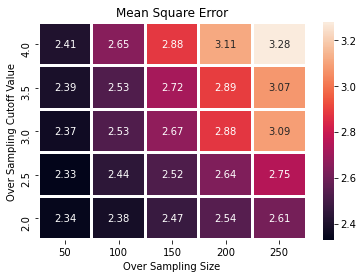

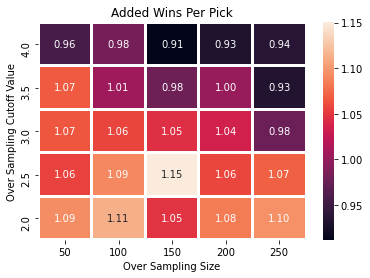

In [20]:
# Do some heatmap stuff
ax = sns.heatmap(mse, xticklabels=OS_sizes, yticklabels=OS_vals, linewidth=2, annot=True, fmt=".2f")
ax.invert_yaxis()
plt.title("Mean Square Error")
plt.ylabel("Over Sampling Value")
plt.xlabel("Over Sampling Size")
plt.show()


ax = sns.heatmap(nw, xticklabels=OS_sizes, yticklabels=OS_vals, linewidth=2, annot=True, fmt=".2f")
ax.invert_yaxis()
plt.title("Added Wins Per Pick")
plt.ylabel("Over Sampling Value")
plt.xlabel("Over Sampling Size")
plt.show()

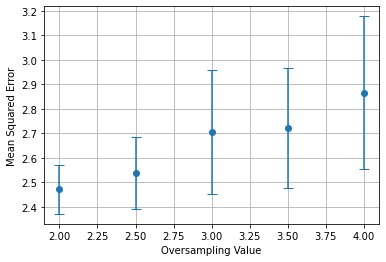

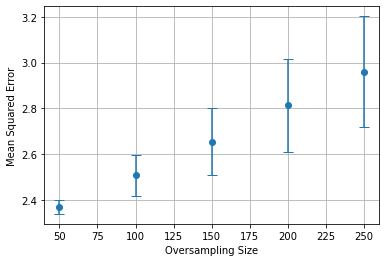

In [25]:
metric = "Mean Squared Error"
plt.figure()
plt.errorbar(x=OS_vals, y=[np.mean(mse[i, :]) for i in range(len(OS_vals))], 
             yerr=[np.std(mse[i, :]) for i in range(len(OS_vals))], fmt="o", capsize=5)
plt.xlabel("Oversampling Value")
plt.ylabel(metric)
plt.grid()

plt.figure()
plt.errorbar(x=OS_sizes, y=[np.mean(mse[:, i]) for i in range(len(OS_sizes))], 
             yerr=[np.std(mse[:, i]) for i in range(len(OS_sizes))], fmt="o", capsize=5)
plt.xlabel("Oversampling Size")
plt.ylabel(metric)
plt.grid()

plt.show()

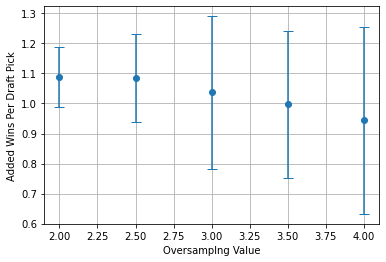

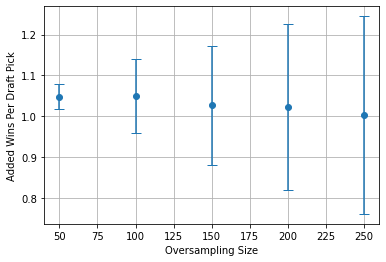

In [27]:
metric = "Added Wins Per Draft Pick"
plt.figure()
plt.errorbar(x=OS_vals, y=[np.mean(nw[i, :]) for i in range(len(OS_vals))], 
             yerr=[np.std(mse[i, :]) for i in range(len(OS_vals))], fmt="o", capsize=5)
plt.xlabel("Oversamplng Value")
plt.ylabel(metric)
plt.grid()

plt.figure()
plt.errorbar(x=OS_sizes, y=[np.mean(nw[:, i]) for i in range(len(OS_sizes))], 
             yerr=[np.std(mse[:, i]) for i in range(len(OS_sizes))], fmt="o", capsize=5)
plt.xlabel("Oversampling Size")
plt.ylabel(metric)
plt.grid()

plt.show()

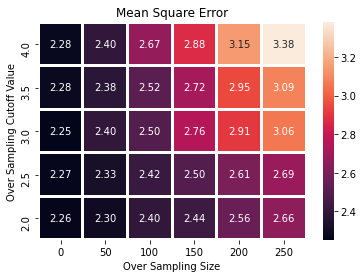

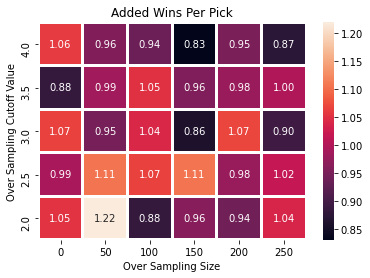

In [10]:
# Do the heatmaps
ax = sns.heatmap(np.array(MSEs).reshape((len(OS_vals),len(OS_sizes))), xticklabels=OS_sizes, 
                 yticklabels=OS_vals, linewidth=2, annot=True, fmt=".2f")
ax.invert_yaxis()
plt.title("Mean Square Error")
plt.ylabel("Over Sampling Cutoff Value")
plt.xlabel("Over Sampling Size")
plt.show()


ax = sns.heatmap(np.array(new_wins).reshape((len(OS_vals),len(OS_sizes))), xticklabels=OS_sizes,
                 yticklabels=OS_vals, linewidth=2, annot=True, fmt=".2f")
ax.invert_yaxis()
plt.title("Added Wins Per Pick")
plt.ylabel("Over Sampling Cutoff Value")
plt.xlabel("Over Sampling Size")
plt.show()

# ax = sns.heatmap(np.array(added_wins).reshape((len(OS_vals),len(OS_sizes))), xticklabels=OS_sizes, yticklabels=OS_vals, linewidth=2)
# ax.invert_yaxis()
# plt.title("Added Wins Per Pick")
# plt.xlabel("Over Sampling Cutoff Value")
# plt.ylabel("Over Sampling Size")
# plt.show()

In [14]:
# Look at distance metrics
distances = ["euclidean", "manhattan"]
counts = list(range(1, 21))
data, params = [], []
for d in distances:
    for c in counts:
        path = "standard_3_{}_0_0.0_{}.npy".format(d, c)
        data.append(np.load(path, allow_pickle=True).tolist())
        params.append(d)
    
MSEs = [np.mean(val["MSE"]) for val in data]
new_wins = [np.mean(val["new_added_wins"]) for val in data]
e_mse, m_mse = [], []
e_nw, m_nw = [], []
for i, p in enumerate(params):
    if p=="euclidean":
        e_mse.append(MSEs[i])
        e_nw.append(new_wins[i])
    if p=='manhattan':
        m_mse.append(MSEs[i])
        m_nw.append(new_wins[i])
print("Euclidean MSE: {} +/- {},  new wins: {} +/- {}".format(np.mean(e_mse), np.std(e_mse), np.mean(e_nw), np.std(e_nw)))
print("Manhattan MSE: {} +/- {},  new wins: {} +/- {}".format(np.mean(m_mse), np.std(m_mse), np.mean(m_nw), np.std(m_nw)))

# SHOULD RUN THIS AGAIN AT SOME POINT, SEEMS ABSOLUTLY SUSPECT 

Euclidean MSE: 2.2801862877731005 +/- 0.010807299115859299,  new wins: 0.9908845872231377 +/- 0.08223756516679034
Manhattan MSE: 2.2754289486967587 +/- 0.014118003412725512,  new wins: 1.1522775947281714 +/- 0.07509696984215306


In [17]:
# Look at scaling techniques
distances = ["standard", "minmax"]
counts = list(range(1, 21))
data, params = [], []
for d in distances:
    for c in counts:
        path = "{}_3_manhattan_0_0.0_{}.npy".format(d, c)
        data.append(np.load(path, allow_pickle=True).tolist())
        params.append(d)
    
MSEs = [np.mean(val["MSE"]) for val in data]
new_wins = [np.mean(val["new_added_wins"]) for val in data]
e_mse, m_mse = [], []
e_nw, m_nw = [], []
for i, p in enumerate(params):
    if p=="standard":
        e_mse.append(MSEs[i])
        e_nw.append(new_wins[i])
    if p=='minmax':
        m_mse.append(MSEs[i])
        m_nw.append(new_wins[i])
print("Standard MSE: {:.5f} +/- {:.5f},  new wins: {:.5f} +/- {:.5f}".format(np.mean(e_mse), np.std(e_mse), 
                                                                              np.mean(e_nw), np.std(e_nw)))
print("MinMax MSE: {:.5f} +/- {:.5f},  new wins: {:.5f} +/- {:.5f}".format(np.mean(m_mse), np.std(m_mse), 
                                                                              np.mean(m_nw), np.std(m_nw)))


Standard MSE: 2.27543 +/- 0.01412,  new wins: 1.15228 +/- 0.07510
MinMax MSE: 2.44305 +/- 0.00877,  new wins: 0.64307 +/- 0.11924


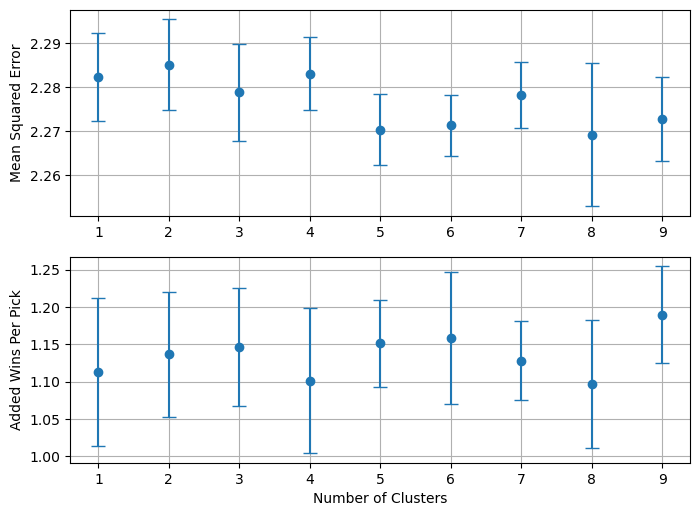

In [19]:
# Look at the number of clusters
# Look at scaling techniques
clusters = [1,2,3,4,5,6,7,8,9]
counts = list(range(1, 11))
data, params = [], []
for n in clusters:
    for c in counts:
        path = "standard_{}_manhattan_0_0.0_{}.npy".format(n, c)
        data.append(np.load(path, allow_pickle=True).tolist())
        params.append(n)
    
MSEs = [np.mean(val["MSE"]) for val in data]
new_wins = [np.mean(val["new_added_wins"]) for val in data]

mse_results = [[] for i in range(len(clusters))]
nw_results = [[] for i in range(len(clusters))]
for i, n in enumerate(params):
    mse_results[clusters.index(n)].append(MSEs[i])
    nw_results[clusters.index(n)].append(new_wins[i])
    
mse_avg = [np.mean(val) for val in mse_results]
mse_std = [np.std(val) for val in mse_results]
nw_avg = [np.mean(val) for val in nw_results]
nw_std = [np.std(val) for val in nw_results]

# do the plots
plt.figure(figsize=(8,6), dpi=100)
ax1 = plt.subplot(211)
plt.errorbar(x=clusters, y=mse_avg, yerr=mse_std, fmt="o",  capsize=5)
plt.grid()
plt.ylabel("Mean Squared Error")


ax2 = plt.subplot(212, sharex=ax1)
plt.errorbar(x=clusters, y=nw_avg, yerr=nw_std, fmt="o",  capsize=5)
plt.grid()
plt.ylabel("Added Wins Per Pick")
plt.xlabel("Number of Clusters")
plt.show()

plt.show()


In [3]:
# Look at loss function stuff
counts = [1,2,3,4,5]
losses = ["mse", "msle", "mae"]
data = []
params = []
for c in counts:
    for l in losses:
        path = "standard_3_manhattan_0_0.0_{}_{}.npy".format(l, c)
        data.append(np.load(path, allow_pickle=True).tolist())
        params.append(l)
    
mses = [np.mean(v["MSE"]) for v in data]
nws = [np.mean(v["new_added_wins"]) for v in data]
# Print this action
loss_mse = [[], [], []]
loss_nw = [[], [], []]
for i, p in enumerate(params):
    loss_mse[losses.index(p)].append(mses[i])
    loss_nw[losses.index(p)].append(nws[i])

Text(0.5, 0, 'Loss Function')

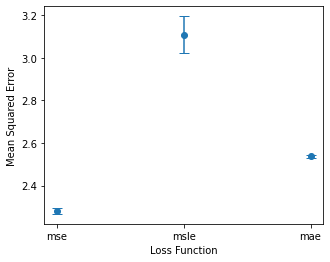

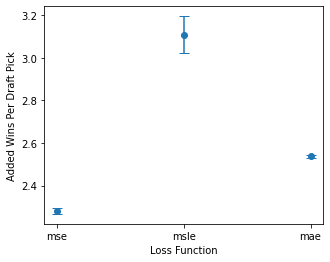

In [4]:
# now plot -- should probably be a bar graph
plt.figure(figsize=(5,4))
plt.errorbar(x=range(len(losses)), y=[np.mean(v) for v in loss_mse], yerr=[np.std(v) for v in loss_mse], 
             fmt="o", capsize=5)
plt.xticks(range(len(losses)), losses)
plt.ylabel("Mean Squared Error")
plt.xlabel("Loss Function")

# now plot -- should probably be a bar graph
plt.figure(figsize=(5,4))
plt.errorbar(x=range(len(losses)), y=[np.mean(v) for v in loss_mse], yerr=[np.std(v) for v in loss_mse], 
             fmt="o", capsize=5)
plt.xticks(range(len(losses)), losses)
plt.ylabel("Added Wins Per Draft Pick")
plt.xlabel("Loss Function")